<a href="https://colab.research.google.com/github/suann124/AIinTeaching/blob/main/lectures/L5_Firstorder_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First-order systems Part 2

-Filippos-

## Recap and Today's Plan
### First-Order Linear ODE Review
We're studying first-order, linear ordinary differential equations of the form:
$$
\frac{dx(t)}{dt} = A x(t) + B u(t), \quad x(0)=x_0
$$


### General Solution
The complete solution consists of two parts:
$$
x(t) =
\underbrace{e^{At}x_0}_{\text{free response } (u \equiv 0)} +
\underbrace{\int_0^t e^{A(t-\tau)} B u(\tau)\, d\tau}_{\text{forced response } (x_0 = 0)}
$$
- **Free response** → The system's natural behavior starting from initial condition $x_0$ with no input  
- **Forced response** → The system's behavior due to the input $u(t)$ starting from rest ($x_0=0$)


## Important Properties
### Stability
- ✅ The system is **stable if and only if** $A < 0$
### Time Constant
-  **$T = \dfrac{1}{|A|}$**
- Characterizes how fast the system responds
> 💡 *Try plotting the step response of* $\frac{dx(t)}{dt}=Ax$ *for* $A=-0.5,-1,-2,-5$ *and observe how the time constant affects response speed.*

<!--
## Response to Step Input
Consider a step input $u(t)=u_m$ (constant for $t \ge 0$) with initial condition $x_0=0$ and $A<0$. Using the complete solution formula, we make the following observations.
### Steady-State Value
As $t \to \infty$, we conclude the state settles to
$$
x_{ss} = -\frac{B}{A} u_m
$$
### Steady-State Gain
If the input is bounded by $M$ (i.e., $|u(t)| \le M$), then the state is bounded by
$$
|x(t)| \le \frac{|B|M}{|a|}
$$
Hence, the **steady-state gain** is
$$
K = -\frac{B}{A}
$$
-->
## This Lecture
We'll explore how the system responds to different types of inputs:
1. **Solution under sinusoidal input** - How does the system respond to oscillating inputs?
2. **Frequency response** - How does the response depend on the frequency of the input?
3. **Frequency response function** - A mathematical tool to characterize this behavior


## Forced Response with Step Input (and zero initial condition)
### Step Input Definition
$$u(t) = \begin{cases}
0 & \text{if } t < 0 \\
u_m & \text{if } t \geq 0
\end{cases}$$


### Solution: Forced Response
For a step input with zero initial condition, the forced response is:
$$x(t) = -\frac{B}{A} u_m \left(1 - e^{At}\right)$$
Hence, the output is
$$y(t) = C x(t) + D u(t) = -\frac{CB}{A}u_m(1-e^{At}) + Du_m$$
This can be rewritten as:
$$y(t) = \left(-\frac{CB}{A}(1-e^{At}) + D\right)u_m$$
> **🤔 Think about it:** What's the physical meaning of the parameter 'D'? How does it affect the output at t=0 compared to steady-state?


## Steady-State Behavior (for stable systems, $A < 0$)
As time grows, $e^{At} \to 0$ when $A < 0$:
**State steady-state:**
$$x_{ss} = -\frac{B}{A}u_m$$
**Output steady-state:**
$$y_{ss} = \left(-\frac{CB}{A} + D\right)u_m$$


## Steady-State Gain
The **steady-state gain** from input $u$ to output $y$ is the ratio of steady-state output to steady-state input:
$$\frac{y_{ss}}{u} = -\frac{CB}{A} + D$$
This tells us how much the output changes per unit change in input at steady-state.

## A Generic Forced Response
The plot below shows the typical forced response of a stable first-order system to a step input (with zero initial condition).

In [15]:
# Generic forced-response plot for a 1st-order system: xdot = a x + b u, step input u = u_m
# - Arrowed axes
# - Asymptote x_ss = -(b/a) u_m
# - One time constant T = 1/|a|
# - Horizontal guide at x(T) = (1 - e^{-1}) x_ss
# - Double arrow showing e^{-1} x_ss (remaining error at t = T)
#
# Works in Jupyter or as a standalone script.
import numpy as np
import matplotlib.pyplot as plt
def plot_forced_response(a=-1.0, b=2.0, u_m=1.0, t_end=6.0, n_pts=1200, save_path=None):
    if a >= 0:
        raise ValueError("Use a < 0 for a stable first-order system.")
    # Time and response
    t = np.linspace(0.0, t_end, n_pts)
    x_ss = -(b / a) * u_m                 # steady-state value
    x = x_ss * (1.0 - np.exp(a * t))      # forced response from zero IC
    T = 1.0 / abs(a)                      # time constant
    x_T = x_ss * (1.0 - np.exp(-1.0))     # value at t = T
    # Figure and axis (single plot, no seaborn, no forced colors)
    fig, ax = plt.subplots(figsize=(10, 5.5))
    # Hide default spines/ticks to draw our own axes with arrowheads
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    # Limits and margins
    x_margin_left = -0.06 * t_end
    x_margin_right = 1.04 * t_end
    y_min = -0.12 * abs(x_ss)
    y_max = 1.22 * x_ss if x_ss > 0 else 1.22 * abs(x_ss)
    if x_ss < 0:  # handle negative b/a if someone sets params oddly
        y_min, y_max = 1.22 * x_ss, 0.12 * abs(x_ss)
    ax.set_xlim(x_margin_left, x_margin_right)
    ax.set_ylim(y_min, y_max)
    # Draw arrowed axes
    ax.annotate("", xy=(x_margin_right, 0), xytext=(x_margin_left, 0),
                arrowprops=dict(arrowstyle="->", linewidth=1.4))
    ax.text(x_margin_right, 0, "t", fontsize=12, va="center", ha="left")
    ax.annotate("", xy=(0, y_max), xytext=(0, y_min),
                arrowprops=dict(arrowstyle="->", linewidth=1.4))
    ax.text(0, y_max, r"$x(t)$", fontsize=12, va="bottom", ha="left")
    # Plot response
    ax.plot(t, x, linewidth=2.2, label=r"$x(t)$")
    # zero IC marker
    ax.plot(0, 0, marker="o", markersize=4)
    ax.text(x_margin_left * 0.3, 0 + 0.02*(y_max - y_min), "zero IC", fontsize=11, ha="right")
    # Asymptote x_ss
    ax.hlines(x_ss, 0, t_end, linestyles="--", linewidth=1.3)
    ax.text(0.03 * t_end, x_ss * (1.02 if x_ss >= 0 else 0.98),
            r"$x_{ss} = -\frac{B}{A}\,u_m$", fontsize=12,
            va="bottom" if x_ss >= 0 else "top")
    # One time constant marker
    ax.vlines(T, 0, x_T, linestyles="--", linewidth=1.3)
    ax.hlines(x_T, 0, T, linestyles="--", linewidth=1.0)
    ax.text(T, y_min + 0.04*(y_max - y_min), r"$1/|A|$ (one time constant)",
            fontsize=11, ha="center", va="top")
    # Error bracket at the right: e^{-1} x_ss (distance from x(T) to x_ss)
    x_pos = t_end * 0.88
    ax.hlines(x_T, x_pos*0.8, x_pos, linestyles="--", linewidth=1.0)
    ax.annotate("", xy=(x_pos, x_ss), xytext=(x_pos, x_T),
                arrowprops=dict(arrowstyle="<->", linewidth=1.2))
    ax.text(x_pos + 0.015 * t_end, (x_ss + x_T) / 2.0,
            r"$e^{-1} x_{ss}$", fontsize=12, va="center")
    # Title
    ax.set_title("A generic forced response", fontsize=16, pad=12)
    plt.tight_layout()
    # if save_path:
    #     plt.savefig(save_path, dpi=200, bbox_inches="tight")
    plt.show()

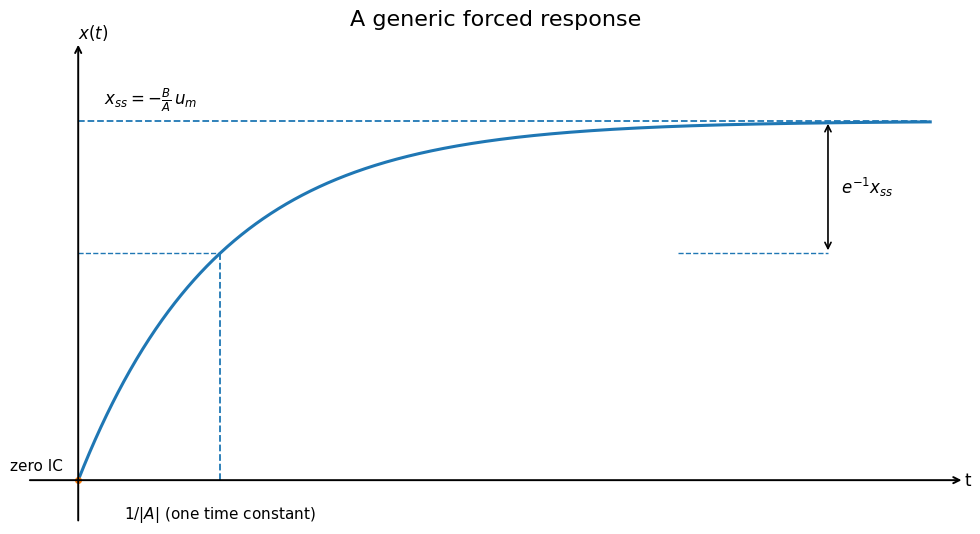

In [16]:
plot_forced_response()

## Example: customize and save

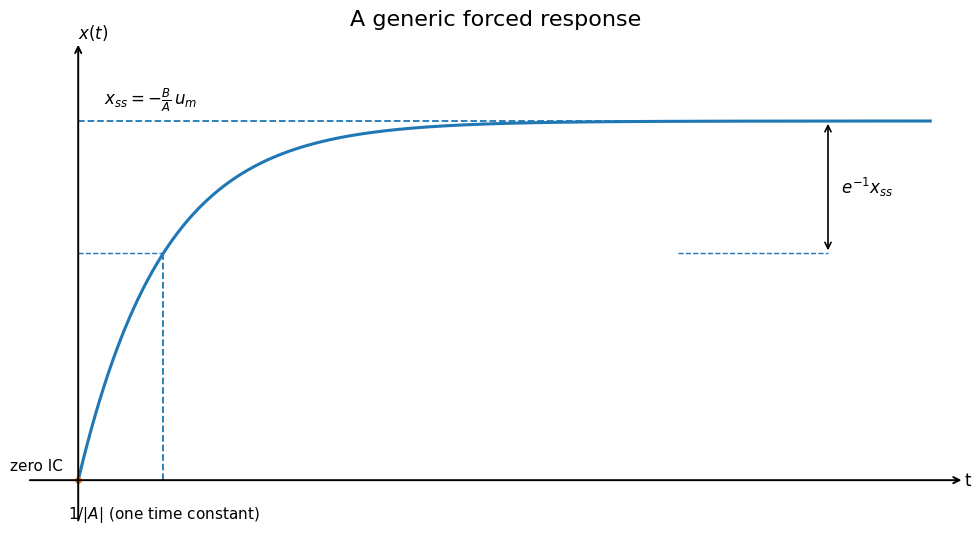

In [17]:
plot_forced_response(a=-2.0, b=1.5, u_m=2.0, t_end=5.0, save_path="forced_response.png")

## Example of Total Response under Step Input
Let
$$
A < 0,\quad x_0 = 1,\quad -\frac{B}{A}\,u_m = 2
$$
Then the total response is
$$
x(t) = e^{A t} + 2(1 -  e^{A t}) = 2 - e^{A t}
$$

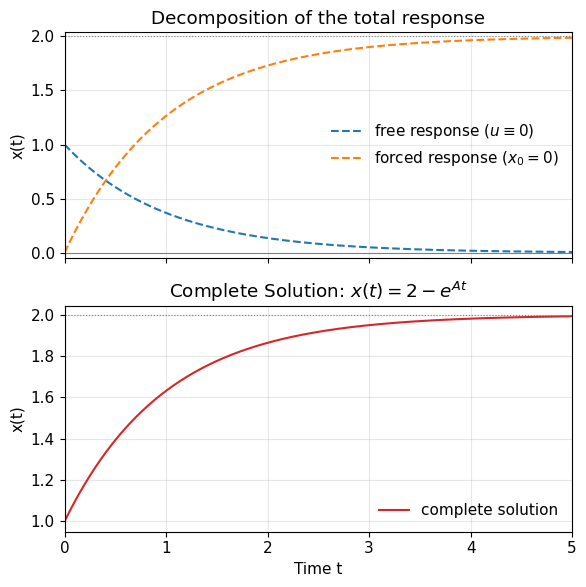

In [18]:
plt.rcParams.update({
    "mathtext.fontset": "dejavusans",
    "font.family": "DejaVu Sans",
    "font.size": 11
})
# ---- Parameters ----
a = -1.0           # stable system (a < 0)
b = 1.0
x0 = 1.0
u_m = 2.0          # chosen so that -(b/a)*u_m = 2
# ---- Time and analytic responses ----
t = np.linspace(0, 5, 400)
x_free   = x0 * np.exp(a*t)
x_forced = -(b/a)*u_m*(1 - np.exp(a*t))
x_total  = x_free + x_forced
# ---- Two stacked subplots ----
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
# (1) Free + Forced components
ax[0].plot(t, x_free, '--', label='free response ($u\\equiv0$)')
ax[0].plot(t, x_forced, '--', label='forced response ($x_0=0$)')
ax[0].axhline(0, color='gray', lw=0.8)
ax[0].axhline(2, color='gray', ls=':', lw=0.8)
ax[0].set_ylabel("x(t)")
ax[0].set_title("Decomposition of the total response")
ax[0].legend(frameon=False)
ax[0].grid(alpha=0.3)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(min(x_free.min(), x_forced.min()) - 0.05,
               max(x_free.max(), x_forced.max()) + 0.05)
# (2) Complete solution
ax[1].plot(t, x_total, color='C3', label='complete solution')
ax[1].axhline(2, color='gray', ls=':', lw=0.8)
ax[1].set_xlabel("Time t")
ax[1].set_ylabel("x(t)")
ax[1].set_title("Complete Solution: $x(t) = 2 - e^{A t}$")
ax[1].legend(frameon=False)
ax[1].grid(alpha=0.3)
ax[1].set_xlim(t[0], t[-1])
ax[1].set_ylim(x_total.min() - 0.05, x_total.max() + 0.05)
plt.tight_layout()
plt.show()

### Visualization of Example
- The free response starts at $1$ and decays to $0$.  
- The forced response starts at $0$ and rises to $2$.  
- The complete solution starts at $1$ and asymptotically approaches $2$.

## Alternative Representation of Sinusoidal Signals
Consider the complex-valued signal:
$$
u(t) = \bar{u}\, e^{j\omega t}, \quad \text{for } t \ge 0
$$
- $\bar{u}$ → fixed **complex number** (amplitude and phase)  
- $\omega$ → fixed **real number** (angular frequency)

---

## Euler’s Formula
$$
e^{j\omega t} = \cos(\omega t) + j \sin(\omega t)
$$
We can interpret $e^{j\omega t}$ geometrically as a **point rotating on the unit circle** in the complex plane:
- $\operatorname{Re}(e^{j\omega t}) = \cos(\omega t)$  
- $\operatorname{Im}(e^{j\omega t}) = \sin(\omega t)$  
- $|e^{j\omega t}| = 1$ for every $\omega$ and $t$

## Visualizing $e^{j\omega t}$  on the Unit Circle

<>:25: SyntaxWarning: invalid escape sequence '\o'
<>:25: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3918398017.py:25: SyntaxWarning: invalid escape sequence '\o'
  ax.text(0.75, -0.85, "Unit Circle\n $|e^{j\omega t}|=1$", fontsize=11, color='gray')


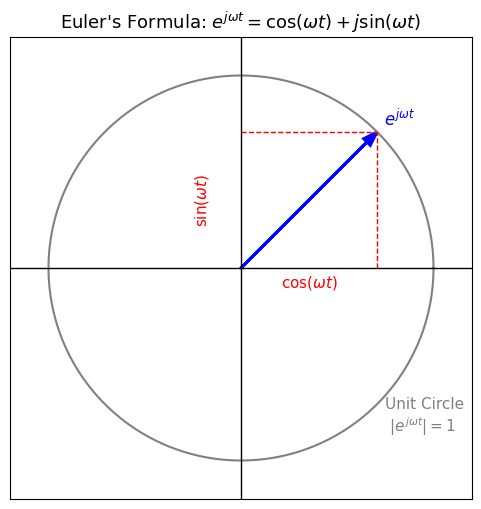

In [6]:
# Parameters
omega = 1.0   # rad/s
t = np.pi/4   # example time instant
# Compute point on the unit circle
x = np.cos(omega * t)
y = np.sin(omega * t)
# Create figure
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', 'box')
# Draw unit circle
theta = np.linspace(0, 2*np.pi, 400)
ax.plot(np.cos(theta), np.sin(theta), 'gray', linewidth=1.5, label='unit circle')
# Axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Radius vector (e^{jωt})
ax.arrow(0, 0, x, y, head_width=0.05, length_includes_head=True, color='blue', linewidth=2)
ax.text(x*1.05, y*1.05, r"$e^{j\omega t}$", color='blue', fontsize=12)
# Projections (cos, sin)
ax.plot([x, x], [0, y], 'r--', linewidth=1)
ax.plot([0, x], [y, y], 'r--', linewidth=1)
ax.text(x/2, -0.1, r"$\cos(\omega t)$", color='red', fontsize=11, ha='center')
ax.text(-0.25, y/2, r"$\sin(\omega t)$", color='red', fontsize=11, va='center', rotation=90)
# Magnitude annotation
ax.text(0.75, -0.85, "Unit Circle\n $|e^{j\omega t}|=1$", fontsize=11, color='gray')
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
# Set limits
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
# Title
ax.set_title("Euler's Formula: $e^{j\\omega t} = \\cos(\\omega t) + j\\sin(\\omega t)$", fontsize=13)
plt.show()

-Mustafa-
## Response of $\frac{dx(t)}{dt} = A x + B u$ with $u(t) = \bar{u} e^{j \omega t}$ and initial condition $x(0) = x_0$

**Assumption:** $A < 0$ (i.e., the system is stable)

---

The solution is given by

$$
x(t) = e^{A t} x_0 + \int_0^t e^{A (t - \tau)} B\, u(\tau) \, d\tau
$$

Substitute $u(\tau) = \bar{u} e^{j \omega \tau}$:

$$
x(t) = e^{A t} x_0 + e^{A t} B \bar{u} \int_0^t e^{-A \tau} e^{j \omega \tau} d\tau
$$

$$
x(t) = e^{A t} x_0 + e^{A t} B \bar{u} \int_0^t e^{(j \omega - A)\tau} d\tau
$$

Note that $j\omega - A \neq 0$ since $j \omega$ is imaginary and $-A$ is real. Using this and taking the definite integral, we get

$$
x(t) = e^{A t} x_0 + \frac{B e^{A t}}{j \omega - A} \bar{u} \left[ e^{(j \omega - A)\tau} \right]_{\tau = 0}^{\tau = t}
$$

$$
x(t) = e^{A t} x_0 + \frac{B e^{A t}}{j \omega - A} \bar{u} \left( e^{(j \omega - A)t} - 1 \right)
$$

Simplify:

$$
x(t) = e^{A t} \left( x_0 - \frac{B \bar{u}}{j \omega - A} \right) + \frac{B }{j \omega - A} \bar{u} e^{j \omega t}
$$

---

### Output Equation

If the output equation is $y = Cx + D u$, then

$$
y(t) = C e^{A t} \left( x_0 - \frac{B \bar{u}}{j \omega - A} \right)
       + \frac{C B}{j \omega - A} \bar{u} e^{j \omega t}
       + D \bar{u} e^{j \omega t}
$$


### Steady-State Response with Input $u(t) = \bar{u} e^{j \omega t}$

We have

$$
y(t) = C e^{A t} \left( x_0 - \frac{B \bar{u}}{j \omega - A} \right)
      + \frac{C B}{j \omega - A} \bar{u} e^{j \omega t}
      + D \bar{u} e^{j \omega t}
$$

Rearranging the terms:

$$
y(t) = C e^{A t} \left( x_0 - \frac{B \bar{u}}{j \omega - A} \right)
      + \left( D + \frac{C B}{j \omega - A} \right) \bar{u} e^{j \omega t}
$$

---

**Note:**  
If $A < 0$, then $e^{A t} \to 0$ as $t \to \infty$.

Hence,

$$
C e^{A t} \left( x_0 - \frac{B \bar{u}}{j \omega - A} \right) \to 0
\quad \text{as } t \to \infty
$$

---

At steady state (i.e., when $e^{A t}$ is sufficiently small),

$$
u(t) = \bar{u} e^{j \omega t}
\quad \Longrightarrow \quad
y_{ss}(t) =
\left( D + \frac{C B}{j \omega - A} \right) \bar{u} e^{j \omega t}
$$

where $y_{ss}(t)$ is the **steady-state output**.

---

### Frequency Response Function

$$
G(j \omega) = D + \frac{C B}{j \omega - A}
$$

is called the **frequency response function**.


### What does all this say about real-valued (sinusoidal) inputs?

**Answer:**  
The **real (imaginary)** part of the output is the output corresponding to the **real (imaginary)** part of the input.

---

**Reasoning:**  
Let the system (★) be given by

$$
\frac{dx(t)}{dt} = A x + B u
$$

$$
y = C x + D u
$$

Suppose

$$
u = u_r + j u_i, \quad x = x_r + j x_i, \quad y = y_r + j y_i
$$

and substitute these into (★).

Then,

$$
\frac{d x_r}{d t} + j \frac{d x_i}{d t}
= A (x_r + j x_i) + B (u_r + j u_i)
$$

$$
y_r + j y_i = C (x_r + j x_i) + D (u_r + j u_i)
$$

The **real and imaginary parts** of these equations must hold individually:

---

$$
\dot{x}_r = A x_r + B u_r, \quad y_r = C x_r + D u_r
$$

**and**

$$
\dot{x}_i = A x_i + B u_i, \quad y_i = C x_i + D u_i
$$

---

Hence, the system responds **independently** to the real and imaginary parts of the input.  
That is, the **real part** of the output corresponds to the **real part** of the input,  
and the **imaginary part** of the output corresponds to the **imaginary part** of the input.


### Some More Facts About Complex Numbers

Consider $H \in \mathbb{C}$ (the set of complex numbers) with $H \neq 0$.

---

#### Definition and Visualization of the Angle of a Complex Number

Define the **angle** $\angle H$ of $H$ as the real number such that

$$
\cos(\angle H) = \frac{\text{Re}(H)}{|H|}, \quad
\sin(\angle H) = \frac{\text{Im}(H)}{|H|}.
$$


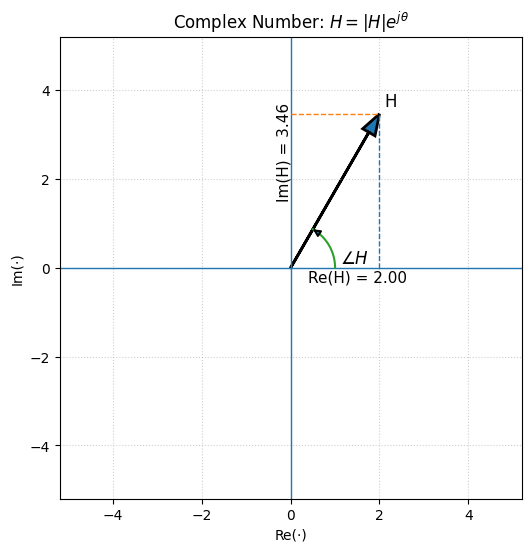

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
H_mag = 4        # |H|
H_angle = np.pi/3  # θ in radians

# --- Components ---
Hr = H_mag * np.cos(H_angle)
Hi = H_mag * np.sin(H_angle)

# Arc radius: one quarter of the magnitude
r = H_mag / 4.0

fig, ax = plt.subplots(figsize=(6, 6))

# Axes
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

# Vector H
ax.arrow(0, 0, Hr, Hi, head_width=0.08*H_mag, head_length=0.12*H_mag,
         length_includes_head=True, linewidth=2)

# Dashed projections to axes
ax.plot([Hr, Hr], [0, Hi], linestyle='--', linewidth=1)
ax.plot([0, Hr], [Hi, Hi], linestyle='--', linewidth=1)

# Angle arc from real axis to θ (center at origin, radius r)
num = 200
theta = np.linspace(0, H_angle, num=num)
ax.plot(r*np.cos(theta), r*np.sin(theta), linewidth=1.5)

# Arrowhead at the end of the arc
delta = 0.12 * np.sign(H_angle if H_angle != 0 else 1.0)
ax.annotate(
    '',
    xy=(r*np.cos(H_angle), r*np.sin(H_angle)),
    xytext=(r*np.cos(H_angle - delta), r*np.sin(H_angle - delta)),
    arrowprops=dict(arrowstyle='-|>', lw=1.5)
)

# Labels
ax.text(Hr*1.05, Hi*1.05, "H", fontsize=12)
ax.text(r*1.1, r*0.1, r"$\angle H$", fontsize=12)
ax.text(1.5*Hr/2, -0.08*H_mag, f"Re(H) = {Hr:.2f}", ha='center', fontsize=11)
ax.text(-0.08*H_mag, 1.5*Hi/2, f"Im(H) = {Hi:.2f}", va='center', rotation=90, fontsize=11)

# Formatting
pad = H_mag * 0.3
ax.set_xlim(-pad- H_mag, H_mag + pad)
ax.set_ylim(-pad- H_mag, H_mag + pad)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel("Re(·)")
ax.set_ylabel("Im(·)")
ax.set_title("Complex Number: $H = |H| e^{j\\theta}$")

ax.grid(True, linestyle=':', alpha=0.6)
plt.show()



#### Real and Imaginary Parts of $H e^{j \theta}$

Let $H = H_R + j H_I$.

Let's look at $\text{Re}(H e^{j \theta})$ and $\text{Im}(H e^{j \theta})$:

$$
\text{Re}(H e^{j \theta}) = \text{Re}\!\left[ (H_R + j H_I)(\cos \theta + j \sin \theta) \right]
$$

Expanding:

$$
= H_R \cos \theta - H_I \sin \theta
$$

Express $H_R$ and $H_I$ in terms of $|H|$ and $\angle H$:

$$
H_R = |H| \cos(\angle H), \quad H_I = |H| \sin(\angle H)
$$

Then,

$$
\text{Re}(H e^{j \theta})
= |H| \left( \cos(\angle H) \cos \theta - \sin(\angle H) \sin \theta \right)
$$

Using the trigonometric identity for $\cos(a + b)$:

$$
\text{Re}(H e^{j \theta}) = |H| \cos(\theta + \angle H)
$$

Similarly,

$$
\text{Im}(H e^{j \theta}) = |H| \sin(\theta + \angle H)
$$

---

Hence,

$$
\boxed{
\begin{aligned}
\text{Re}(H e^{j \theta}) &= |H| \cos(\theta + \angle H) \\
\text{Im}(H e^{j \theta}) &= |H| \sin(\theta + \angle H)
\end{aligned}
}
$$

### Constructing the Sinusoidal Steady-State Output

---

#### The facts we already derived:

- For an exponential input

$$
u(t) = \bar{u} e^{j \omega t}
\quad \Longrightarrow \quad
y_{ss}(t) = G(j \omega) \bar{u} e^{j \omega t},
$$

where $G(j \omega) \bar{u}$ is, in general, a **complex-valued** quantity.

---

- For a complex number $H$ and a real number $\theta$ (for $H \neq 0$):

$$
\text{Re}(H e^{j \theta}) = |H| \cos(\theta + \angle H).
$$

---

#### Now, consider a **real sinusoidal input**:

If

$$
u(t) = \cos(\omega t) = \text{Re}(e^{j \omega t}),
$$

then

$$
y_{ss}(t) = |G(j \omega)| \cos(\omega t + \angle G(j \omega)).
$$

---

If instead

$$
u(t) = \sin(\omega t) = \text{Im}(e^{j \omega t}),
$$

then

$$
y_{ss}(t) = |G(j \omega)| \sin(\omega t + \angle G(j \omega)).
$$

---

Finally, if the input is constant, i.e.

$$
u(t) = 1 = e^{j \cdot 0 \cdot t},
$$

then

$$
y_{ss}(t) = |G(0)| = D - \frac{C B}{A}
\quad \text{(as before)}.
$$

---

**Note:**  
This page connects the **complex exponential analysis** with the **real sinusoidal steady-state response** — it is very important.


-Adam-

## The System

$$
\frac{dx(t)}{dt} = -x + u \\
y = 2x
$$

This corresponds to $A=-1$, $B=1$, $C=2$, $D=0$.

The transfer function from $u$ to $y$ is
$$
G(s)=\frac{2}{s+1}.
$$

> Quick check: is the system stable? How can we check?

<details>
  <summary><b>Click to reveal details</b></summary>

  $A = -1 < 0$
  
  The system is stable

</details>

Let's also check this in code:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

A = np.array([[-1.0]])
B = np.array([[ 1.0]])
C = np.array([[ 2.0]])
D = np.array([[ 0.0]])

sys_ss = signal.StateSpace(A, B, C, D)

# Transfer function form for frequency response utilities
num, den = signal.ss2tf(A, B, C, D)
sys_tf = signal.TransferFunction(num[0], den)

# Stability check: all eigenvalues of A have negative real part
eigvals = np.linalg.eigvals(A)
print("A eigenvalues:", eigvals)
print("Stable:", np.all(np.real(eigvals) < 0))

A eigenvalues: [-1.]
Stable: True


/usr/local/lib/python3.12/dist-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


## Plot a a response for a sinusoidal input (with initial condition for x = 3)

We choose $u(t)=\sin(\omega t)$ with $\omega=3$ rad/s and initial condition $x(0)=3$. We simulate on $t \in [0, 20]$ s.

We have

$$
G(\omega) = \frac{2}{j\omega + 1}
$$

Evaluating at \( \omega = 3 \):

$$
G(3) = \frac{2}{3j + 1}
$$

$$
|G(3)| = \frac{2}{|3j + 1|} = \frac{2}{\sqrt{10}} \approx 0.63
$$

$$
\angle G(3) = \angle \frac{2}{3j + 1}
= 0 - \angle (3j + 1)
\approx -1.25~\text{rad}
$$

Hence, the steady-state output is

$$
y_{\text{ss}}(t) \approx 0.63 \sin(3t - 1.25)
$$

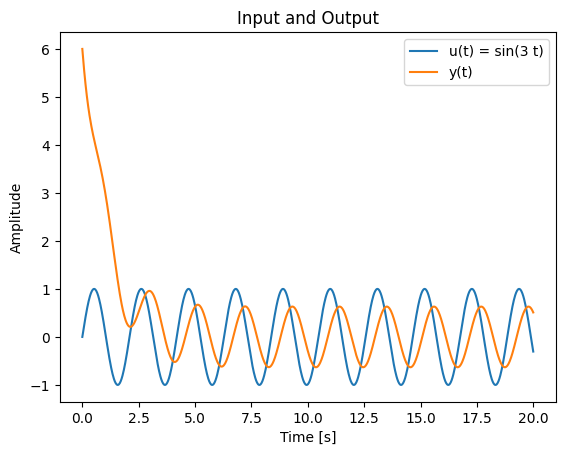

In [ ]:
omega = 3.0
t = np.linspace(0.0, 20.0, 1000)
u = np.sin(omega * t)
x0 = np.array([3.0])

tout, y, x = signal.lsim(sys_ss, U=u, T=t, X0=x0)

# Plot input and output
plt.figure()
plt.plot(tout, u, label="u(t) = sin(3 t)")
plt.plot(tout, y, label="y(t)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Input and Output")
plt.legend()
plt.show()

Initially, the input and output look different.

Once the system reaches steady-state, the output oscillates with the same frequency as the the input with a different magnitude and with a time shift.

## Plot the frequency response function

For $G(s)=2/(s+1)$, the frequency response is $G(j\omega)=2/(1+j\omega)$. The magnitude is $2/\sqrt{1+\omega^2}$ and the phase is $-\arctan(\omega)$ radians. We compute these numerically and confirm the expected values.

|G(j3)|  numeric = 0.632466,  analytic = 0.632456
∠G(j3)  numeric = -71.5647°,  analytic = -71.5651°


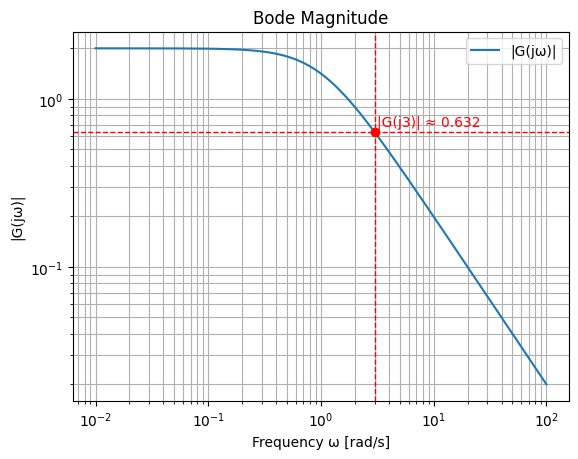

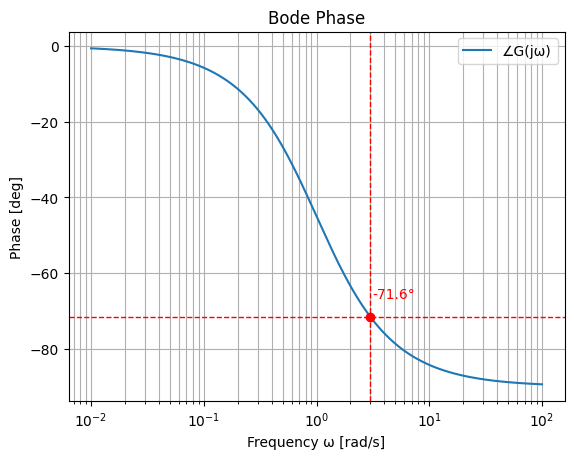

In [ ]:
# Frequency grid
w = np.logspace(-2, 2, 800)  # rad/s
w, H = signal.freqresp(sys_tf, w=w)

mag = np.abs(H)
phase = np.angle(H)

# Analytical reference values
mag_ref = 2.0 / np.sqrt(1.0 + omega**2)
phase_ref = -np.arctan(omega)

# Numeric interpolation (for plotting)
mag_at_3 = np.interp(omega, w, mag)
phase_at_3 = np.interp(omega, w, np.unwrap(phase))

print(f"|G(j3)|  numeric = {mag_at_3:.6f},  analytic = {mag_ref:.6f}")
print(f"∠G(j3)  numeric = {np.degrees(phase_at_3):.4f}°,  analytic = {np.degrees(phase_ref):.4f}°")

# --- Plot magnitude ---
plt.figure()
plt.loglog(w, mag, label="|G(jω)|")
plt.scatter([omega], [mag_ref], color="red", zorder=5)
plt.axvline(omega, color="red", linestyle="--", linewidth=1.0)
plt.axhline(mag_ref, color="red", linestyle="--", linewidth=1.0)
plt.text(omega*1.05, mag_ref*1.1, f"|G(j3)| ≈ {mag_ref:.3f}", color="red")
plt.xlabel("Frequency ω [rad/s]")
plt.ylabel("|G(jω)|")
plt.title("Bode Magnitude")
plt.legend()
plt.grid(which='both')
plt.show()

# --- Plot phase ---
plt.figure()
plt.semilogx(w, np.degrees(phase), label="∠G(jω)")
plt.scatter([omega], [np.degrees(phase_ref)], color="red", zorder=5)
plt.axvline(omega, color="red", linestyle="--", linewidth=1.0)
plt.axhline(np.degrees(phase_ref), color="red", linestyle="--", linewidth=1.0)
plt.text(omega*1.05, np.degrees(phase_ref)+5, f"{np.degrees(phase_ref):.1f}°", color="red")
plt.xlabel("Frequency ω [rad/s]")
plt.ylabel("Phase [deg]")
plt.title("Bode Phase")
plt.legend()
plt.grid(which='both')
plt.show()

The numbers on $G$ calculated in the previous pages can be read from the Bode plot for the system.

Expected values at $\omega=3$ are $|G| \approx 0.6325$ and $\angle G \approx -71.565^\circ$. The numeric result should match.

Let's model the system in MATLAB:

In [8]:
%%writefile first_order_frequency_response.m

a = -1;
b = 1;
c = 2;
d = 0;
sys = ss(a,b,c,d);

t = linspace(0,20,100);
u = sin(3*t);
y = lsim(sys,u,t,3);
figure (1);
plot(t,y,'r','linewidth',2); xlabel('t'); ylabel('u and y'); hold on
plot(t,u,'k','linewidth',2);
grid on;

figure(2);
h = bodeplot(sys);
setoptions(h,'MagUnits','abs','MagScale','log');
grid on;

[mag,phase] = bode(sys,3)

Writing first_order_frequency_response.m


In [11]:
!apt install -qq octave

octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [13]:
!octave -W first_order_frequency_response.m

error: 'ss' undefined near line 6, column 6

The 'ss' function belongs to the control package from Octave Forge which
seems to not be installed in your system.

Please read <https://www.octave.org/missing.html> to learn how you can
contribute missing functionality.
error: called from
    first_order_frequency_response at line 6 column 5


# ---- EXTRAS ----

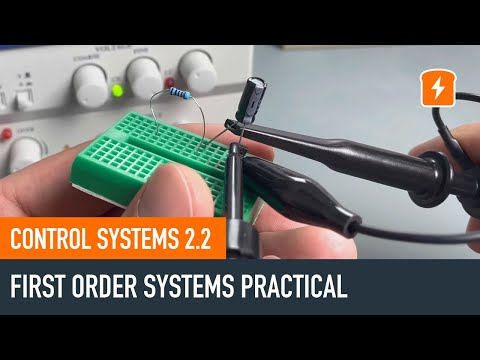

In [ ]:
from IPython.display import YouTubeVideo

# Example: Embed a YouTube video with ID 'dQw4w9WgXcQ'
YouTubeVideo('yHODmWE2LGk', width=640, height=360)

### To complement matlab scripts

#### 1. Code blocks

```matlab
% Example MATLAB script
t = 0:0.01:10;
y = sin(t);
plot(t,y);

#### 2. write to .m file

In [ ]:
%%writefile demo_script.m
t = 0:0.01:10;
y = sin(t);
plot(t,y);

Writing demo_script.m
